In [365]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [366]:
uk_merc = pd.read_csv('../data/UK_car_prices/merc.csv')

Let's have the first look at the data

In [367]:
uk_merc.shape

(13119, 9)

In [368]:
uk_merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [369]:
uk_merc.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [370]:
uk_merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


Now see how our merces distributed by every variable, check for NaNs, ouliers, missing or incorrect values

In [371]:
uk_merc['model'].unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [372]:
uk_merc[uk_merc['model'].isin(['180', '220', '230', '200'])]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10463,180,2014,10799,Manual,39240,Diesel,20,72.4,1.5
11347,230,2007,4500,Automatic,94000,Petrol,520,29.4,0.0
11995,220,2018,19995,Automatic,9814,Diesel,145,61.4,2.0
11996,200,2018,19495,Manual,15113,Diesel,145,64.2,2.2


It's a mistake, lets delete these rows

In [373]:
uk_merc.drop([10463, 11347, 11995, 11996], inplace=True)

In [374]:
uk_merc[uk_merc.duplicated() == True]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
493,V Class,2018,19998,Manual,27222,Diesel,145,46.3,2.1
494,V Class,2016,17998,Manual,21981,Diesel,200,46.3,2.1
1328,GLB Class,2020,35400,Semi-Auto,2000,Diesel,145,46.3,2.0
1505,E Class,2016,15995,Semi-Auto,60931,Diesel,125,58.9,2.1
1506,C Class,2018,19950,Semi-Auto,33082,Diesel,145,64.2,2.1
...,...,...,...,...,...,...,...,...,...
10517,E Class,2015,18995,Automatic,7315,Diesel,160,50.4,3.0
10518,E Class,2015,18995,Automatic,7315,Diesel,160,50.4,3.0
11742,E Class,2016,17990,Automatic,39000,Diesel,30,65.7,2.0
12800,B Class,2020,27490,Automatic,2563,Diesel,145,55.4,2.0


In [375]:
uk_merc.drop_duplicates(inplace=True)

<AxesSubplot:>

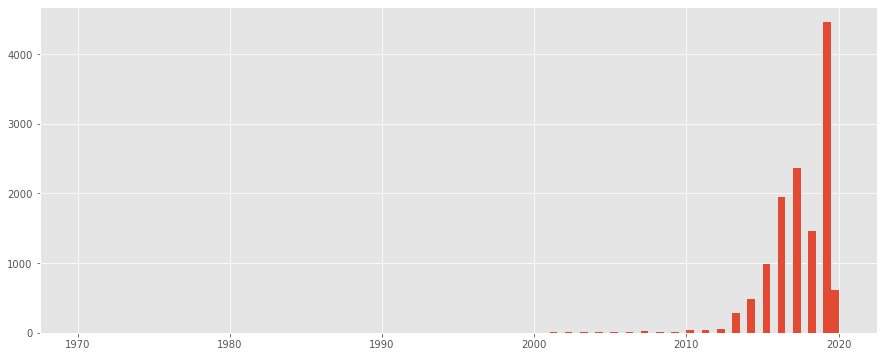

In [376]:
plt.figure(figsize=(15,6))
uk_merc['year'].hist(bins=100)

histogram is heavily biased on the right, so i guess what we have extremes and outliers, take a look at the boxplot:

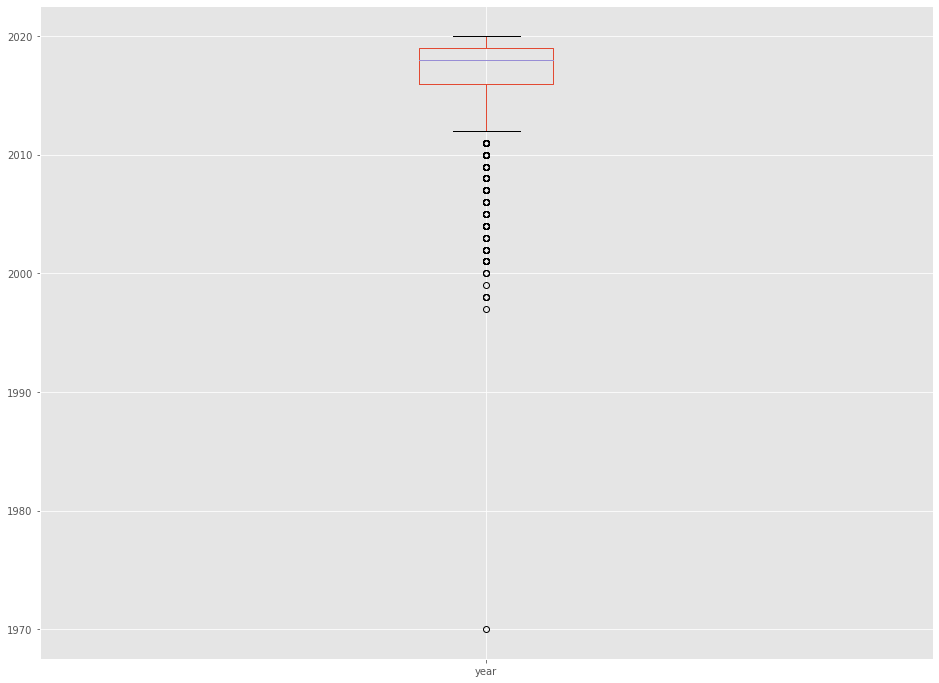

In [377]:
BP = uk_merc.boxplot(column='year', figsize=(16,12))

In [378]:
uk_merc['year'].value_counts()

2019    4456
2017    2367
2016    1947
2018    1458
2015     981
2020     618
2014     485
2013     291
2012      57
2011      38
2010      38
2007      21
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
1970       1
Name: year, dtype: int64

<AxesSubplot:>

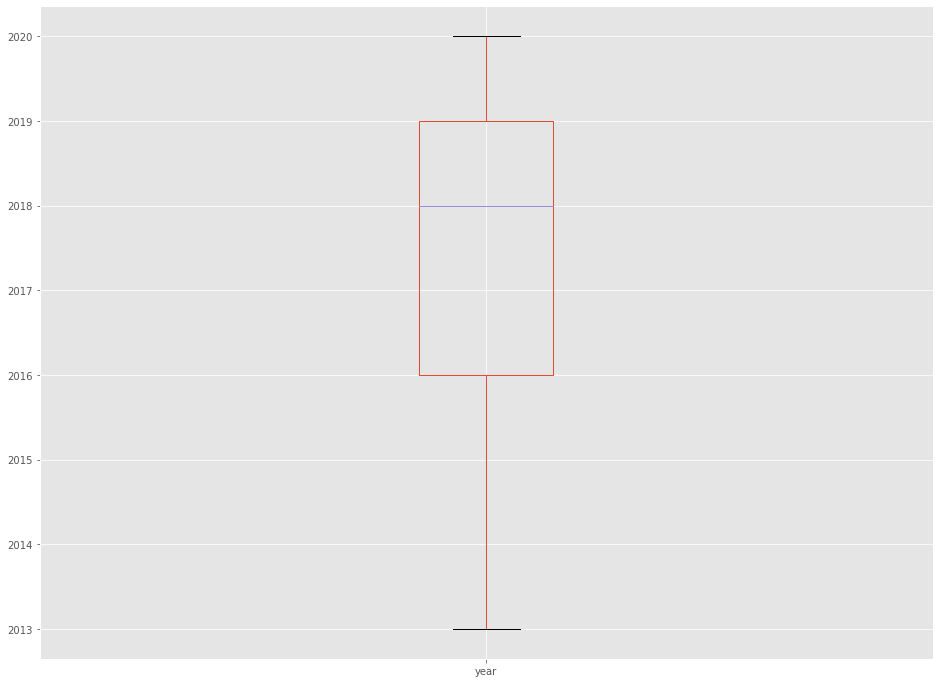

In [379]:
uk_merc[uk_merc.year > 2012].boxplot(column='year', figsize=(16,12))

As we can see, bias due to a small numbers of cars older 2012, so we can drop them and analyze apart later if needed 

In [380]:
uk_merc = uk_merc[uk_merc['year'] > 2012]

<AxesSubplot:xlabel='year', ylabel='Count'>

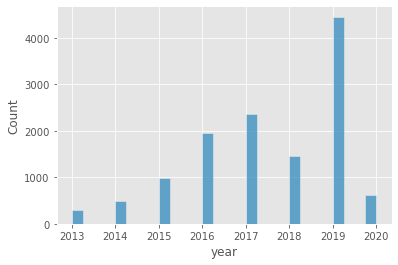

In [381]:
sns.histplot(data=uk_merc['year'])

In [382]:
uk_merc['year'].value_counts()

2019    4456
2017    2367
2016    1947
2018    1458
2015     981
2020     618
2014     485
2013     291
Name: year, dtype: int64

In [383]:
uk_merc[uk_merc['year'].isna() == True]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


<AxesSubplot:>

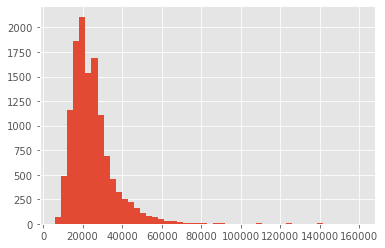

In [384]:
uk_merc['price'].hist(bins=50)

In [385]:
uk_merc[['price']].sort_values(by='price')

,price
11103,5950
11404,5995
11928,6775
11822,7000
11523,7199
...,...
8,139948
6386,139995
8737,140319
10044,154998


<AxesSubplot:>

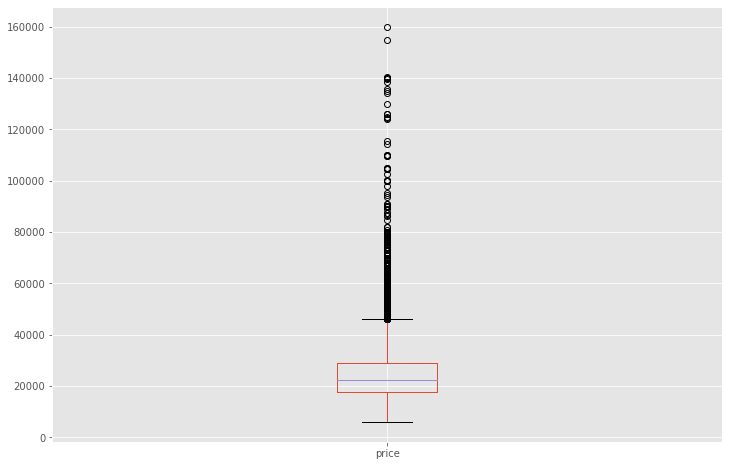

In [386]:
uk_merc.boxplot(column='price', figsize=(12,8))

In [387]:
uk_merc['price'].describe()

count     12603.000000
mean      24967.775054
std       11674.770573
min        5950.000000
25%       17599.000000
50%       22499.000000
75%       28995.000000
max      159999.000000
Name: price, dtype: float64

<AxesSubplot:>

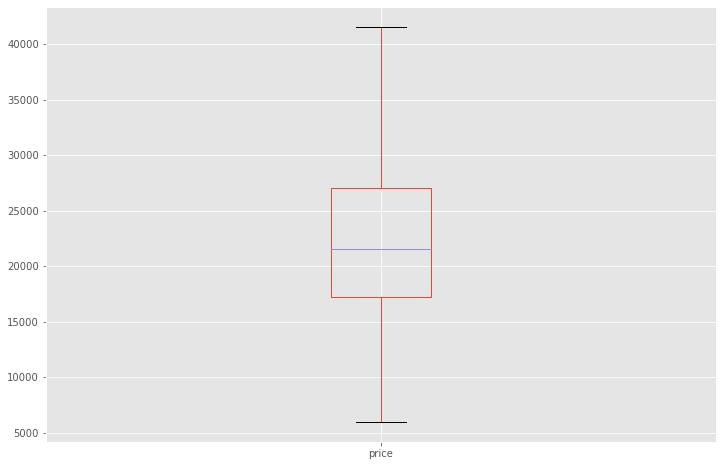

In [388]:
uk_merc[uk_merc['price'] < 41600].boxplot(column='price', figsize=(12,8))

We have some extra expensive cars, drop them for now

In [389]:
uk_merc = uk_merc[uk_merc['price'] < 41600]

In [390]:
uk_merc['transmission'].value_counts()

Semi-Auto    6074
Automatic    4173
Manual       1392
Other           2
Name: transmission, dtype: int64

In [391]:
uk_merc[uk_merc['transmission'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
12762,SLK,2015,12995,Other,39000,Diesel,150,56.5,2.1


Missing values near thansmission, drop that rows

In [392]:
uk_merc.drop([9650, 12762], inplace=True)

<AxesSubplot:>

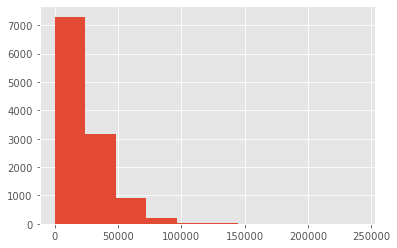

In [393]:
uk_merc['mileage'].hist()

In [394]:
uk_merc[uk_merc['mileage'] > 150000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11123,E Class,2014,7295,Automatic,152280,Diesel,30,58.9,2.1
11928,E Class,2015,6775,Automatic,166086,Diesel,30,64.2,2.1
12017,E Class,2014,7995,Automatic,154000,Diesel,30,58.9,2.1
12904,A Class,2016,16249,Automatic,240494,Diesel,20,68.9,2.1


In [395]:
uk_merc = uk_merc[uk_merc['mileage'] < 150000]

In [396]:
uk_merc['fuelType'].value_counts()

Diesel    8408
Petrol    3059
Hybrid     161
Other        6
Name: fuelType, dtype: int64

In [397]:
uk_merc[uk_merc['fuelType'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11740,GLE Class,2016,31990,Automatic,46000,Other,0,76.4,3.0
12095,C Class,2016,13850,Automatic,77814,Other,0,134.5,2.0
12184,C Class,2017,17400,Automatic,52897,Other,0,134.5,2.0
12270,C Class,2017,16000,Automatic,54011,Other,0,134.5,2.0
12389,C Class,2015,15000,Automatic,53400,Other,0,134.5,2.0
12894,C Class,2020,40999,Automatic,400,Other,135,217.3,2.0


I can't define the fuelType of these cars... drop...

In [398]:
uk_merc.drop([11740, 12095, 12184, 12270, 12389, 12894], inplace=True)

In [399]:
uk_merc[uk_merc['fuelType'] == 'Hybrid'].value_counts()

model     year  price  transmission  mileage  fuelType  tax  mpg    engineSize
 A Class  2020  30231  Semi-Auto     4000     Hybrid    140  1.1    1.3           1
 C Class  2016  19599  Semi-Auto     68770    Hybrid    0    74.3   2.1           1
          2017  18399  Automatic     22167    Hybrid    135  134.5  2.0           1
                18498  Semi-Auto     42100    Hybrid    0    134.5  2.0           1
                                     48404    Hybrid    0    134.5  2.0           1
                                                                                 ..
          2016  17498  Semi-Auto     63507    Hybrid    0    76.4   2.1           1
                17500  Automatic     52749    Hybrid    0    76.4   2.1           1
                       Semi-Auto     41758    Hybrid    0    134.5  2.0           1
                17979  Automatic     47448    Hybrid    0    134.5  2.0           1
 S Class  2017  36890  Automatic     22657    Hybrid    20   61.4   2.1          

Few hybrid cars are add a lot of noise in MPG ratio and not common, so we can drop them

In [400]:
uk_merc = uk_merc[uk_merc['fuelType'] != 'Hybrid']

<AxesSubplot:>

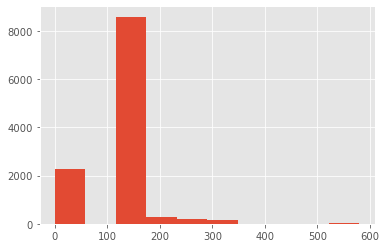

In [401]:
uk_merc['tax'].hist()

<AxesSubplot:>

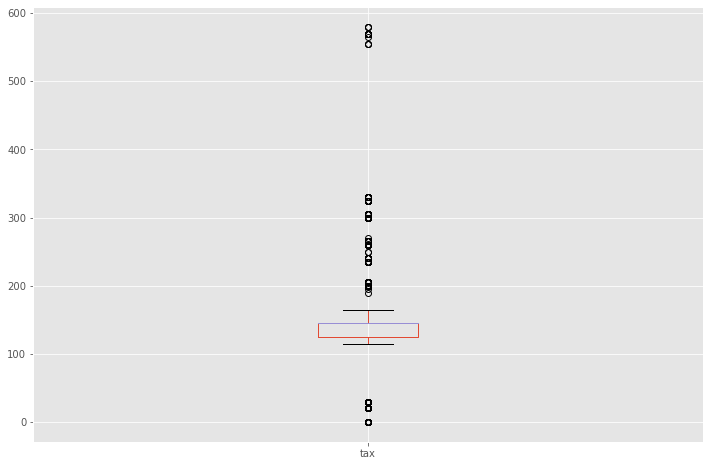

In [402]:
uk_merc.boxplot('tax', figsize=(12,8))

In [403]:
uk_merc[uk_merc['tax'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
512,A Class,2015,11498,Manual,32648,Diesel,0,74.3,1.5
917,A Class,2016,13695,Manual,41600,Diesel,0,80.7,1.5
1131,B Class,2014,8200,Manual,39331,Diesel,0,74.3,1.5
1544,A Class,2014,10490,Manual,37642,Diesel,0,78.5,1.5
1577,A Class,2015,10490,Semi-Auto,49816,Diesel,0,70.6,1.5
1666,A Class,2014,9761,Manual,50116,Diesel,0,78.5,1.5
2369,A Class,2014,11915,Manual,12522,Diesel,0,78.5,1.5
3981,A Class,2015,11444,Manual,27000,Diesel,0,74.3,1.5
3994,A Class,2016,13823,Automatic,25151,Diesel,0,76.4,1.5
5134,A Class,2016,14552,Semi-Auto,25653,Diesel,0,76.4,1.5


I've made small research and discover: cars registered after March 1 2001 are classified into a range of bands according to their level of CO2 emissions, with cars in higher bands generally being subject to higher rates of road tax. Cars with "band A" have tax-free.

<AxesSubplot:>

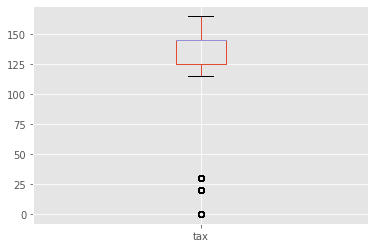

In [404]:
uk_merc[uk_merc['tax'] < 190].boxplot('tax')

In [405]:
uk_merc[uk_merc['tax'] > 190].value_counts()

model       year  price  transmission  mileage  fuelType  tax  mpg   engineSize
 A Class    2013  21495  Semi-Auto     14700    Petrol    200  40.9  2.0           1
 M Class    2013  15200  Semi-Auto     61363    Diesel    200  44.8  2.1           1
 GLS Class  2017  38250  Automatic     7208     Diesel    305  37.2  3.0           1
                  38343  Automatic     26452    Diesel    305  37.2  3.0           1
                  38459  Automatic     25237    Diesel    305  37.2  3.0           1
                                                                                  ..
 GL Class   2016  35371  Automatic     14253    Diesel    325  36.2  3.0           1
                  36500  Automatic     16000    Diesel    300  36.2  3.0           1
                  38362  Semi-Auto     17000    Diesel    305  36.2  3.0           1
            2017  27990  Automatic     24000    Diesel    200  47.9  2.1           1
 X-CLASS    2020  31991  Automatic     303      Diesel    265  35.8  2

We have only 600+ cars with huge tax (it's because some cars has sport or high-volumed engines), for that analysis we can drop them

In [406]:
uk_merc = uk_merc[uk_merc['tax'] < 190]

<AxesSubplot:>

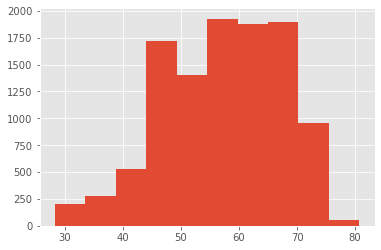

In [407]:
uk_merc['mpg'].hist()

<AxesSubplot:>

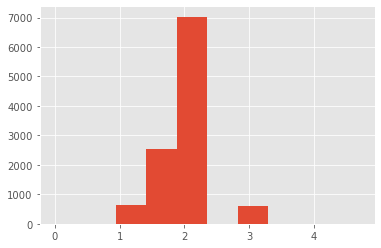

In [408]:
uk_merc['engineSize'].hist()

In [409]:
uk_merc[uk_merc['engineSize'] < 1]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,2016,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2018,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2018,18000,Automatic,18347,Diesel,150,65.7,0.0
9654,A Class,2016,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,2016,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2018,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,2017,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,2017,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2018,22738,Automatic,24000,Diesel,150,61.4,0.0


It's absolutely mistake, drop that values

In [410]:
uk_merc = uk_merc[uk_merc['engineSize'] > 1]

In [411]:
uk_merc[uk_merc['engineSize'] >= 3.5]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1923,CLS Class,2017,28995,Semi-Auto,8591,Petrol,150,39.2,3.5
2177,C Class,2017,35420,Semi-Auto,24057,Petrol,150,34.5,4.0
5549,C Class,2018,33690,Semi-Auto,12055,Petrol,145,40.9,4.0
6310,C Class,2017,36895,Semi-Auto,20699,Petrol,145,33.6,4.0
8423,C Class,2017,41399,Semi-Auto,8797,Petrol,145,32.8,4.0
8940,SL CLASS,2017,39999,Semi-Auto,19200,Petrol,145,31.4,4.7
9782,C Class,2017,33990,Automatic,30000,Petrol,145,33.6,4.0
11682,C Class,2017,36000,Automatic,45979,Petrol,150,34.5,4.0


In [412]:
uk_merc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1
9,GLA Class,2017,19750,Automatic,15258,Diesel,30,64.2,2.1
10,A Class,2020,32980,Automatic,606,Petrol,145,35.8,2.0
11,A Class,2020,26980,Automatic,1000,Diesel,145,62.8,1.5
12,B Class,2019,23750,Automatic,278,Diesel,145,55.4,2.0
...,...,...,...,...,...,...,...,...,...
13113,C Class,2020,30999,Automatic,1000,Diesel,145,64.2,2.0
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1


I think we're done, I cleaned all mistakes and missing values. I've many data so I can just drop values I am not interested in. Now let's move on to dependencies and relationships between variables.

(0.717149926728933, 0.0)

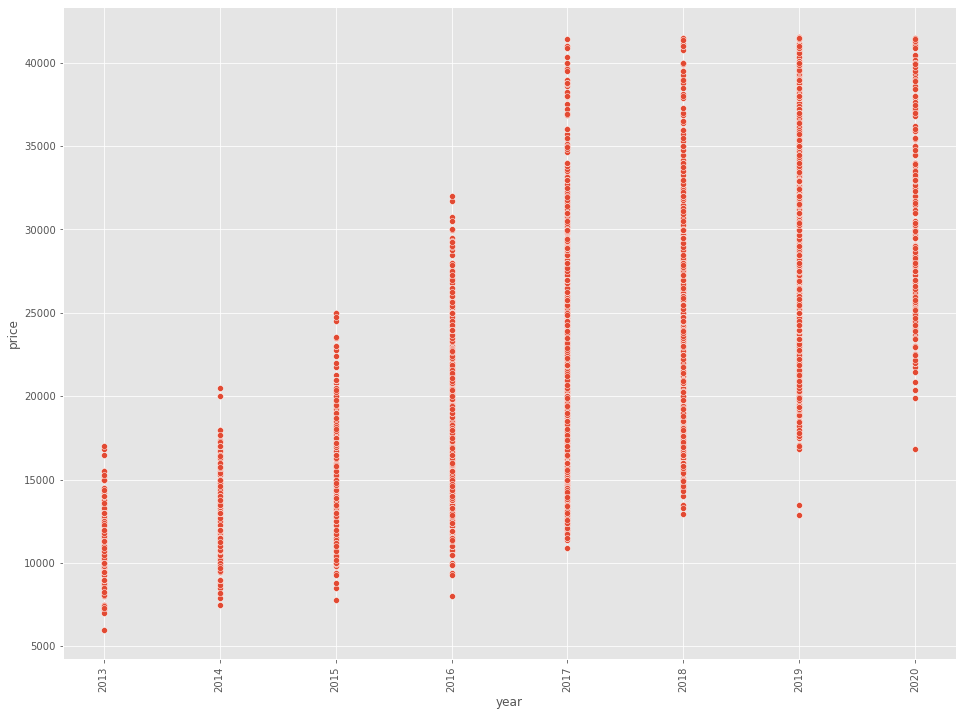

In [413]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.scatterplot(data=uk_merc, x=uk_merc.year, y=uk_merc.price)
stats.pearsonr(x=uk_merc.year, y=uk_merc.price)

<AxesSubplot:xlabel='transmission', ylabel='Percent'>

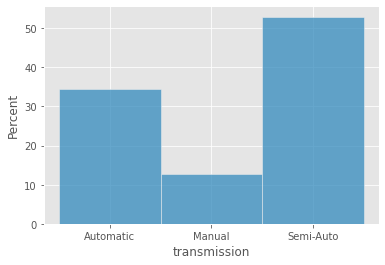

In [415]:
sns.histplot(data=uk_merc, x=uk_merc.transmission, stat='percent')

<AxesSubplot:xlabel='fuelType', ylabel='Percent'>

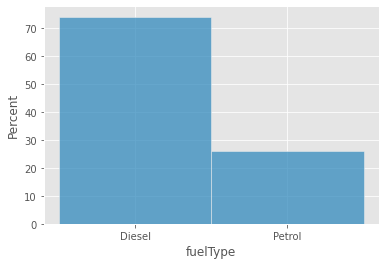

In [416]:
sns.histplot(data=uk_merc, x=uk_merc.fuelType, stat='percent')

In [323]:
uk_merc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1
9,GLA Class,2017,19750,Automatic,15258,Diesel,30,64.2,2.1
10,A Class,2020,32980,Automatic,606,Petrol,145,35.8,2.0
11,A Class,2020,26980,Automatic,1000,Diesel,145,62.8,1.5
12,B Class,2019,23750,Automatic,278,Diesel,145,55.4,2.0
...,...,...,...,...,...,...,...,...,...
13113,C Class,2020,30999,Automatic,1000,Diesel,145,64.2,2.0
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1


(-0.7491510947563995, 0.0)

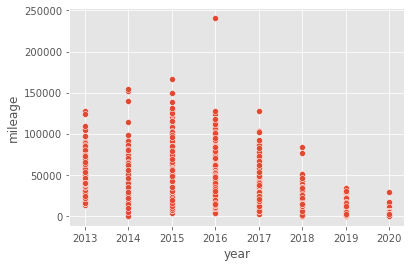

In [351]:
sns.scatterplot(data=uk_merc, x=uk_merc.year, y=uk_merc.mileage)
stats.pearsonr(x=uk_merc.year, y=uk_merc.mileage)

Let's define the most popular Mercedes models in the UK:

<AxesSubplot:xlabel='model', ylabel='count'>

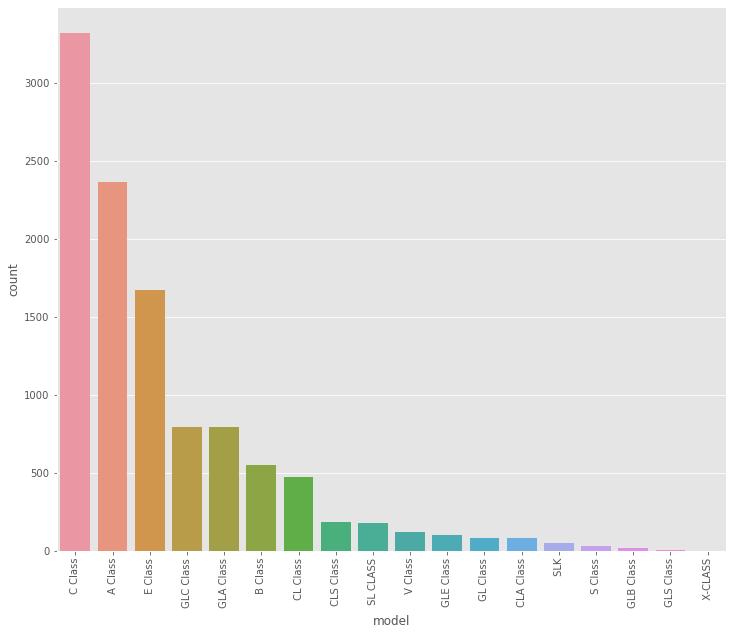

In [430]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
count_of_model = uk_merc['model'].value_counts().sort_values(ascending=False)
sns.countplot(data=uk_merc, x=uk_merc.model, order=count_of_model.index)

Compare models by their engine types:

<AxesSubplot:xlabel='model', ylabel='count'>

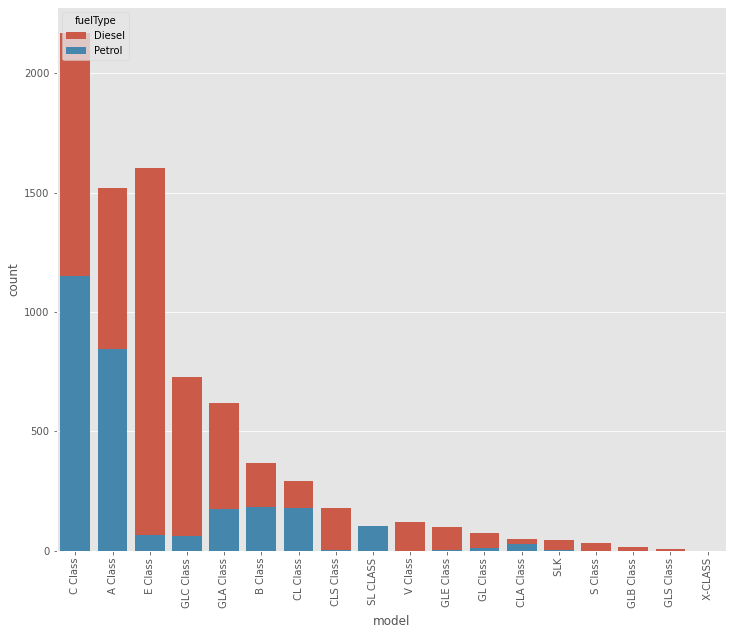

In [432]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
count_of_model = uk_merc['model'].value_counts().sort_values(ascending=False)
sns.countplot(data=uk_merc, x=uk_merc.model, hue=uk_merc.fuelType, order=count_of_model.index, dodge=False)

In [433]:
uk_merc.to_csv('uk_mercedes_clean.csv')